## Plot the zonal mean and meridional mean of the Pacific SST  

In [1]:
%matplotlib inline
import cosima_cookbook as cc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np

netcdf_index loaded.


In [2]:
## Load SST from expt - last 4 outputs (TODO: would prefer to do this by year)
mom_sst_01 = cc.get_nc_variable('mom01v5/KDS75_newbathy_JRA_runoff', 'ocean.nc', 'temp',n=3, time_units = 'days since 1901-01-01').isel(st_ocean=0).sel(time=slice('1910-01','1910-12')).mean('time')
mom_sst_01.shape

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=3), HTML(value='')))

(2700, 3600)

In [3]:
mom_sst_10 = cc.get_nc_variable('access-om2/1deg_jra55_ryf9091_kds75_sss6p5', 'ocean.nc', 'temp',n=0, time_units = 'days since 1700-01-01').isel(st_ocean=0).sel(time=slice('1900-01','1900-12')).mean('time')
mom_sst_10 = mom_sst_10 - 273.15

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=22), HTML(value='')))

In [4]:
#obs_sst = cc.get_nc_variable('woa13/01', 'woa13_ts_\d+_mom01.nc', 'temp',time_units = 'days since 1900-01-01').isel(ZT=0)
tmp = cc.get_nc_variable('woa13/monthly', 'woa13_decav_ts_\d+_04v2.nc', 'potential_temperature').isel(depth=0)
obs_sst = tmp[:12,:,:].mean('time')
obs_sst.data, obs_sst.lon.data = shiftgrid(0., obs_sst.data, obs_sst.lon.data, start=True)

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=13), HTML(value='')))

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [5]:
# latitude: 25S-25N, longitude: 120E-80W
obs_sst_eq = obs_sst.sel(lat=slice(-25,25)).sel(lon=slice(120,280))
m_obs_sst_lon = obs_sst_eq.mean('lon')
m_obs_sst_lat = obs_sst_eq.mean('lat')
m_obs_sst_lon

<xarray.DataArray 'potential_temperature' (lat: 200)>
array([ 23.315336,  23.423679,  23.527203,  23.624676,  23.718439,  23.807374,
        23.891742,  23.973521,  24.056208,  24.140631,  24.227596,  24.315978,
        24.4129  ,  24.507582,  24.601606,  24.69623 ,  24.794495,  24.886627,
        24.969293,  25.049044,  25.137769,  25.223252,  25.299035,  25.363751,
        25.437814,  25.501682,  25.572002,  25.627075,  25.692275,  25.753559,
        25.834339,  25.904649,  25.972059,  26.03424 ,  26.100619,  26.187901,
        26.266657,  26.322303,  26.378935,  26.443812,  26.519338,  26.589115,
        26.643254,  26.703643,  26.751752,  26.808656,  26.865398,  26.903956,
        26.950367,  26.990019,  27.03241 ,  27.079521,  27.115017,  27.134164,
        27.170603,  27.219535,  27.246317,  27.264684,  27.293601,  27.312668,
        27.326889,  27.331015,  27.355115,  27.364671,  27.381435,  27.370477,
        27.384116,  27.404838,  27.4096  ,  27.407518,  27.404155,  27.386706

In [6]:
# latitude: 25S-25N, longitude: 120E-80W
mom_sst_01_eq = mom_sst_01.sel(yt_ocean=slice(-25,25)).sel(xt_ocean=slice(-240,-80))
m_mom_sst_01_lon = mom_sst_01_eq.mean('xt_ocean')
m_mom_sst_01_lat = mom_sst_01_eq.mean('yt_ocean')
m_mom_sst_01_lon.shape

(516,)

In [7]:
# latitude: 25S-25N, longitude: 120E-80W
mom_sst_10_eq = mom_sst_10.sel(yt_ocean=slice(-25,25)).sel(xt_ocean=slice(-240,-80))
m_mom_sst_10_lon = mom_sst_10_eq.mean('xt_ocean')
m_mom_sst_10_lat = mom_sst_10_eq.mean('yt_ocean')
m_mom_sst_10_lon.shape

(110,)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


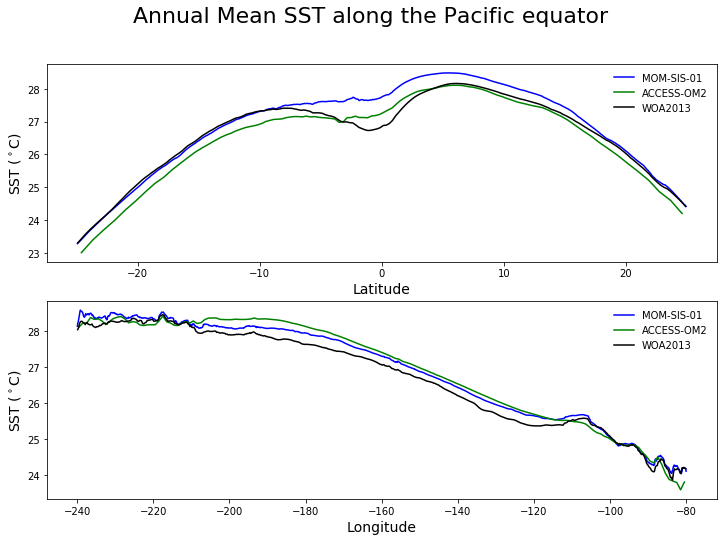

In [8]:
fig = plt.figure( figsize=(12,8) )
ax = fig.add_subplot(2, 1, 1)
plt.plot(m_mom_sst_01_lon.yt_ocean, m_mom_sst_01_lon,'b', label="MOM-SIS-01")
plt.plot(m_mom_sst_10_lon.yt_ocean, m_mom_sst_10_lon,'g', label="ACCESS-OM2")
plt.plot(m_obs_sst_lon.lat, m_obs_sst_lon,'k', label="WOA2013")
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('SST ($^\circ$C)', fontsize=14 )
#cbar = plt.colorbar(cax)
plt.legend(frameon=False, fontsize=10)

ax = fig.add_subplot(2, 1, 2)
plt.plot(m_mom_sst_01_lat.xt_ocean, m_mom_sst_01_lat,'b', label="MOM-SIS-01")
plt.plot(m_mom_sst_10_lat.xt_ocean, m_mom_sst_10_lat,'g', label="ACCESS-OM2")
plt.plot(m_obs_sst_lat.lon.values-360., m_obs_sst_lat,'k', label="WOA2013")
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('SST ($^\circ$C)', fontsize=14 )
#cbar = plt.colorbar(cax)
plt.legend(frameon=False, fontsize=10)

fig.suptitle('Annual Mean SST along the Pacific equator', fontsize=22)
plt.savefig('plot_sst_pac.png')